# Assignment 2 - Data Preprocessing
### Ahsan Shakoor


- Deadline: Thursday, 20.11.2024
- Data Source: https://www.kaggle.com/datasets/jacopoferretti/wages-and-education-of-young-males-dataset/data


In this assignment, you will preprocess and clean a dataset by handling missing values, correcting inconsistencies, normalizing or encoding features, and removing outliers to prepare it for analysis or modeling. The expected result is a clean, structured dataset ready for further analysis or machine learning._

In [80]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


In [81]:
df = pd.read_csv(r'Males.csv')

In [114]:
df.wage.describe()

count    4360.000000
mean        1.649147
std         0.532609
min        -3.579079
25%         1.350717
50%         1.671143
75%         1.991086
max         4.051860
Name: wage, dtype: float64

In [82]:
df.sample(5)

,rownames,nr,year,school,exper,union,ethn,maried,health,wage,industry,occupation,residence
52,53,126,1984,13,6,no,other,no,no,1.922438,Trade,Sales_Workers,north_east
198,199,464,1986,13,8,no,other,yes,no,1.573538,Trade,Sales_Workers,north_east
1671,1672,3414,1987,16,8,no,other,yes,no,2.195281,Manufacturing,"Professional, Technical_and_kindred",nothern_central
732,733,1554,1984,12,6,no,other,yes,no,1.455859,Manufacturing,"Craftsmen, Foremen_and_kindred",south
887,888,1961,1987,12,11,no,other,yes,no,2.298619,Business_and_Repair_Service,"Craftsmen, Foremen_and_kindred",nothern_central


In [83]:
df.shape

(4360, 13)

In [84]:
df.isnull().sum()

rownames         0
nr               0
year             0
school           0
exper            0
union            0
ethn             0
maried           0
health           0
wage             0
industry         0
occupation       0
residence     1245
dtype: int64

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4360 entries, 0 to 4359
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rownames    4360 non-null   int64  
 1   nr          4360 non-null   int64  
 2   year        4360 non-null   int64  
 3   school      4360 non-null   int64  
 4   exper       4360 non-null   int64  
 5   union       4360 non-null   object 
 6   ethn        4360 non-null   object 
 7   maried      4360 non-null   object 
 8   health      4360 non-null   object 
 9   wage        4360 non-null   float64
 10  industry    4360 non-null   object 
 11  occupation  4360 non-null   object 
 12  residence   3115 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 442.9+ KB


In [86]:
df[['union', 'ethn', 'maried', 'health', 'industry', 'occupation', 'residence']].nunique()

union          2
ethn           3
maried         2
health         2
industry      12
occupation     9
residence      4
dtype: int64

In [87]:
print(df['union'].value_counts())
df['ethn'].value_counts()

union
no     3296
yes    1064
Name: count, dtype: int64


ethn
other    3176
hisp      680
black     504
Name: count, dtype: int64

In [88]:

columns_to_encode = ['union', 'ethn', 'maried', 'health', 'industry', 'occupation']

label_encoders = {col: LabelEncoder() for col in columns_to_encode}

for col in columns_to_encode:
    df[col] = label_encoders[col].fit_transform(df[col])




In [ ]:
df["residence"] = df["residence"].map({"south": 0, "nothern_central": 1,"north_east": 2, "rural_area": 3})

In [89]:
df.head()


,rownames,nr,year,school,exper,union,ethn,maried,health,wage,industry,occupation,residence
0,1,13,1980,14,1,0,2,0,0,1.197540,1,8,north_east
1,2,13,1981,14,2,1,2,0,0,1.853060,7,8,north_east
2,3,13,1982,14,3,0,2,0,0,1.344462,1,8,north_east
3,4,13,1983,14,4,0,2,0,0,1.433213,1,8,north_east
4,5,13,1984,14,5,0,2,0,0,1.568125,7,1,north_east


In [91]:
df.duplicated().sum()

0

In [92]:
df.isnull().sum()

rownames         0
nr               0
year             0
school           0
exper            0
union            0
ethn             0
maried           0
health           0
wage             0
industry         0
occupation       0
residence     1245
dtype: int64

In [93]:
df['residence'].value_counts()

residence
south              1333
nothern_central     964
north_east          733
rural_area           85
Name: count, dtype: int64

In [94]:
df.isna().sum()


rownames         0
nr               0
year             0
school           0
exper            0
union            0
ethn             0
maried           0
health           0
wage             0
industry         0
occupation       0
residence     1245
dtype: int64

In [101]:
df.describe()

,rownames,nr,year,school,exper,union,ethn,maried,health,wage,industry,occupation,residence
count,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000,3115.000000
mean,2180.500000,5262.058716,1983.500000,11.766972,6.514679,0.244037,1.612844,0.438991,0.016972,1.649147,6.416514,3.827294,0.861958
std,1258.767916,3496.149815,2.291551,1.746181,2.825873,0.429564,0.684519,0.496321,0.129183,0.532609,3.355978,2.607758,0.868089
min,1.000000,13.000000,1980.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.579079,0.000000,0.000000,0.000000
25%,1090.750000,2329.000000,1981.750000,11.000000,4.000000,0.000000,1.000000,0.000000,0.000000,1.350717,5.000000,1.000000,0.000000
50%,2180.500000,4569.000000,1983.500000,12.000000,6.000000,0.000000,2.000000,0.000000,0.000000,1.671143,5.000000,4.000000,1.000000
75%,3270.250000,8406.000000,1985.250000,12.000000,9.000000,0.000000,2.000000,1.000000,0.000000,1.991086,10.000000,6.000000,2.000000
max,4360.000000,12548.000000,1987.000000,16.000000,18.000000,1.000000,2.000000,1.000000,1.000000,4.051860,11.000000,8.000000,3.000000


<Axes: >

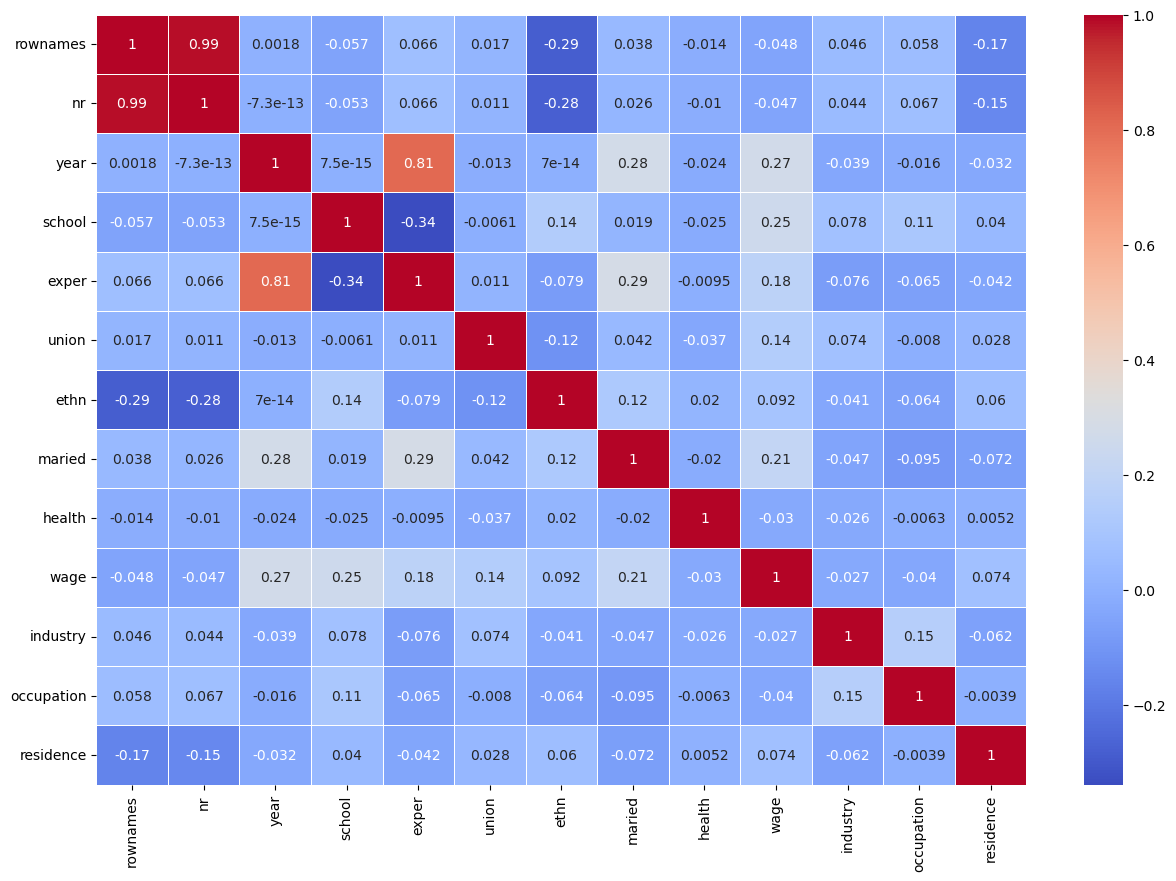

In [108]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, ax=ax)